In [1]:
# Clean the data for the Medicare Hospital Spending per Patient - State csv

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the spending per patient csv
spending_per_patient = pd.read_csv(Path('..\Resources\Medicare_Hospital_Spending_Per_Patient-State.csv'))



In [12]:
# Drop the columns that are not needed and keep state and score
spending_per_patient_state = spending_per_patient[['State', 'Score']]



In [4]:
# Convert the score column to a numeric value
spending_per_patient_state['Score'] = pd.to_numeric(spending_per_patient_state['Score'], errors='coerce')

In [5]:
# Convert NaN values to 0
spending_per_patient_state = spending_per_patient_state.fillna(0)
spending_per_patient_state.head()


,State,Score
0,AK,0.92
1,AL,0.96
2,AR,1.00
3,AS,0.00
4,AZ,0.94


In [6]:
# Filter out states with 0 scores
spending_per_patient_state = spending_per_patient_state.loc[spending_per_patient_state['Score'] != 0]


<Axes: title={'center': 'Medicare Hospital Spending per Patient - State'}, xlabel='State', ylabel='Score'>

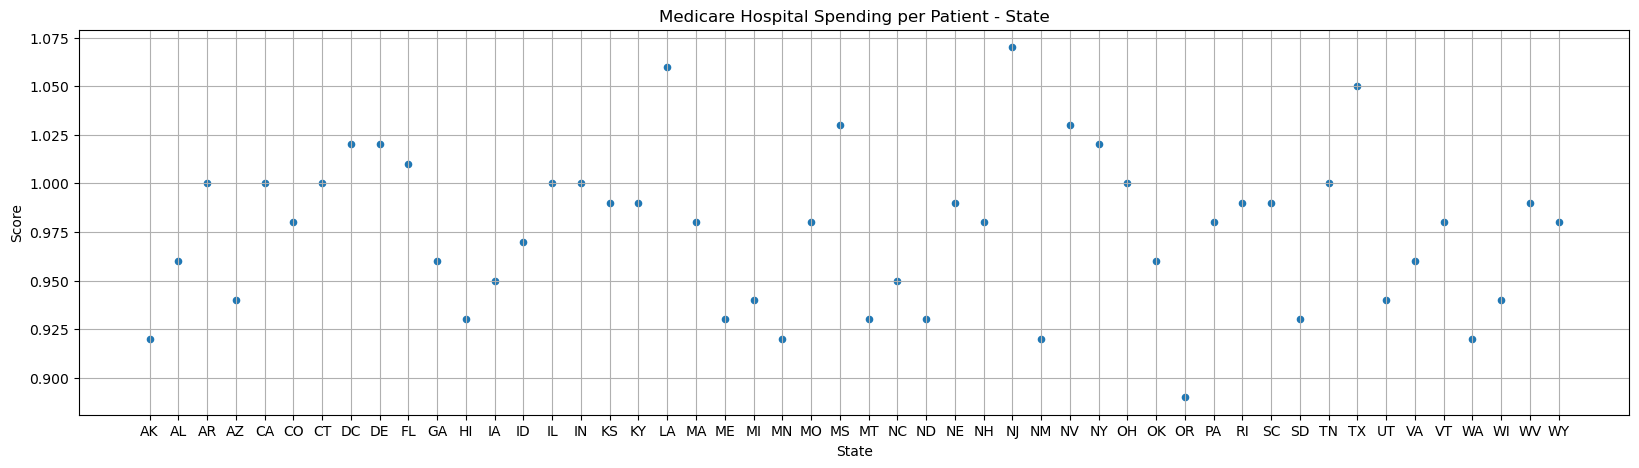

In [7]:
# Create a scatterplot of the data using the index as the x-axis and the score as the y-axis
spending_per_patient_state.plot(kind='scatter', x='State', y='Score', figsize=(20,5), grid=True, title='Medicare Hospital Spending per Patient - State')

In [9]:
# Find the mean, median, and mode of the score
mean = spending_per_patient_state['Score'].mean()
median = spending_per_patient_state['Score'].median()
mode = spending_per_patient_state['Score'].mode()
print(f'The mean is {mean}')
print(f'The median is {median}')
print(f'The mode is {mode}')

The mean is 0.976
The median is 0.98
The mode is 0    0.98
1    1.00
Name: Score, dtype: float64


Text(0, 0.5, 'Spending per Patient')

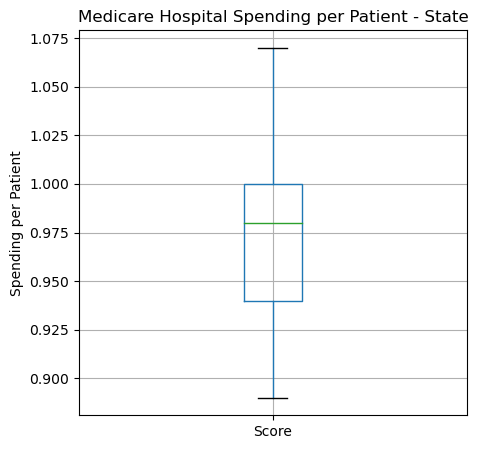

In [10]:
# Create a boxplot to find outliers
spending_per_patient_state.boxplot(column=['Score'], figsize=(5,5))

# Add title and labels to the boxplot
plt.title('Medicare Hospital Spending per Patient - State')
plt.ylabel('Spending per Patient')


In [11]:
#Output the spending per patient state to csv in outputs folder
spending_per_patient_state.to_csv(Path('..\Outputs\Medicare_Hospital_Spending_Per_Patient-State-clean.csv'), index=False)
